<a href="https://colab.research.google.com/github/alanfmorato/BETA/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualization

![](https://media-exp1.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=1669248000&v=beta&t=Jrz7HA1m-Qbhm08T89CaeaESJnsodVxsetVxJHVsVKM)

[Fonte da imagem](https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/)

**Classifique como tarefa supervisionada ou não-supervisionada:**

1. Segmentação de clientes para entendermos melhor diferentes perfis: ________
2. Classificação de clientes em churn e não-churn: ________
3. Agrupamento de produtos similares entre si: ________
4. Redução da dimensionalidade dos dados: ________
5. Previsão da probabilidade de um cliente contratar o serviço: ________

<details>
  <summary><b>Respostas</b></summary>
  <ol type="1">
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  <li><b>unsupervised learning</b></li>
  <li><b>unsupervised learning</b></li>
  <li>supervised learning</li>
  </ol>
</details>


# Setup

In [ ]:
#yellowbricks

In [ ]:
!pip install prince
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift
from sklearn.metrics import silhouette_score, davies_bouldin_score

import prince                               # factor analysis (including categorical data)
from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# K-means

App de simulação:
- [Versão em português](https://cmcouto-silva-kmeans-app-pt-streamlit-app-tyl62y.streamlitapp.com/)
- [Versão em inglês](https://cmcouto-silva-kmeans-app-en-streamlit-app-v886a2.streamlitapp.com/)

Requerimentos:
- Dados numéricos contínuos
- Dados na mesma escala
- Pré-determinação do número de grupos

Vantagens:
- Rápido

Desvantagens:
- Adequado apenas para dados numéricos contínuos

## Simulated Data

In [ ]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(5E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,1.998996,1.535900
1,-2.788784,2.773154
2,-0.956255,3.630438
3,2.777738,-1.508286
4,0.982364,5.013279


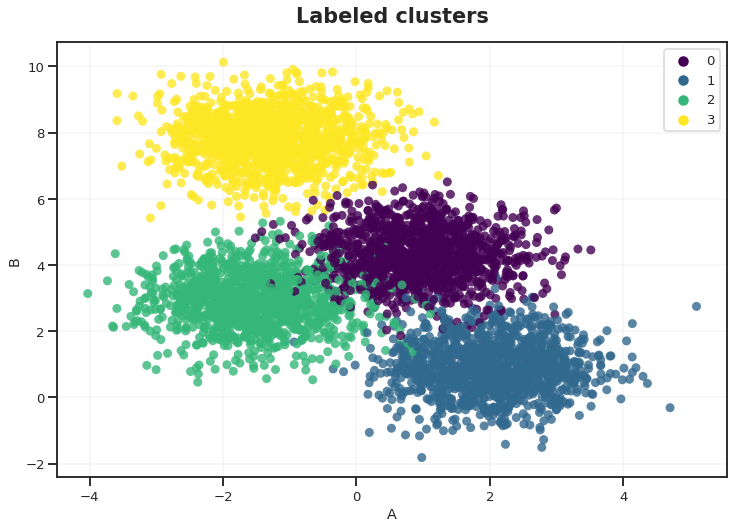

In [ ]:
# Visualize simulated clusters
sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

## Distinct APIs for K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função
centroids, labels, inertia = k_means(X, n_clusters=2, random_state=0)

In [ ]:
# Using KMeans
model = KMeans(n_clusters=2, random_state=0)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
intertia = model.inertia_

## Model evaluation

Métricas:
- Inércia
- Silhouette
- Davies Bouldin

Exemplo de aplicação:

In [ ]:
silhouette_score(X, labels)
davies_bouldin_score(X, labels)

0.6225299776282516

Testando distintos agrupamentos:

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Greys')
# colocar gráfico cotovelo ao lado

,inertia,silhouette_score,davies_bouldin_score
k,,,
2,21560.408252,0.515911,0.622530
3,11109.654785,0.524957,0.707935
4,5976.759031,0.578246,0.585966
5,5420.318913,0.493568,0.824047
6,4868.312284,0.429343,0.982976
7,4372.174929,0.337104,1.128953
8,3917.117225,0.315862,1.175141
9,3520.796889,0.319956,1.089390
10,3197.647190,0.325477,1.010998


In [ ]:
(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k').style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset='silhouette_score')
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score
k,,,
2,21560.408252,0.515911,0.622530
3,11109.654785,0.524957,0.707935
4,5976.759031,0.578246,0.585966
5,5420.318913,0.493568,0.824047
6,4868.312284,0.429343,0.982976
7,4372.174929,0.337104,1.128953
8,3917.117225,0.315862,1.175141
9,3520.796889,0.319956,1.089390
10,3197.647190,0.325477,1.010998


Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
X_random = np.random.rand(*X.shape)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k':k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient(cmap='Greys')

Comparando de forma interativa:

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

# DBSCAN

In [ ]:
@interact(eps=(0.01, 1, 0.01), min_samples=3)
def f(eps, min_samples):
  _,labels = dbscan(X, eps=eps, min_samples=min_samples)
  sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)
  plt.show()

# MeanShift

In [ ]:
MeanShift?

In [ ]:
model = MeanShift(n_jobs=-1)
model.fit(X)

MeanShift(n_jobs=-1)

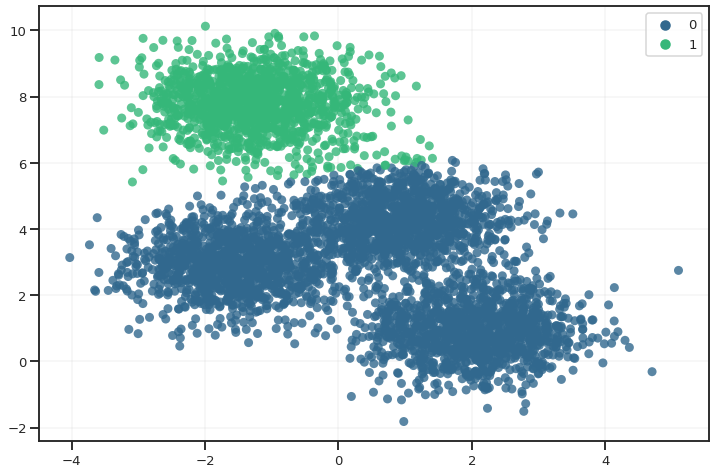

In [ ]:
labels = model.predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, **scatter_kwargs)

In [ ]:
print(silhouette_score(X, labels))
print(davies_bouldin_score(X, labels))

0.5229137002916987
0.5945321816750259


# Hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import ward_tree, AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

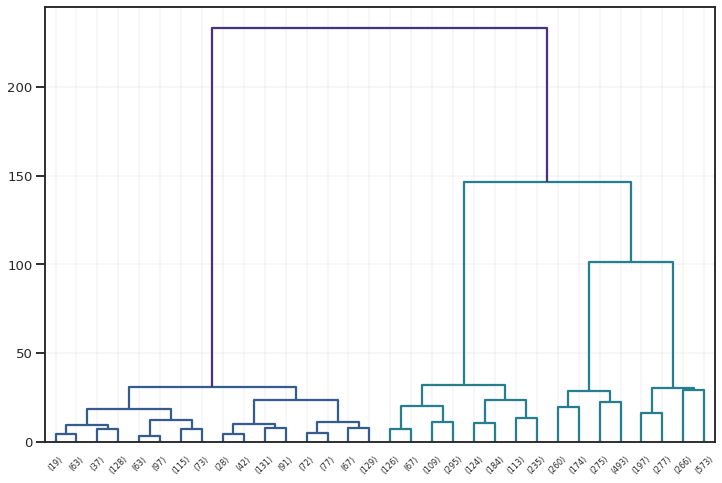

In [ ]:
# Function from: 
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode="level", p=4)

# High dimensional data

In [ ]:
# Simulate clusters with high dimensional data
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=10, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_components = 3
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(df)
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components)])
display(df_pca)
# explained_var

,PC1,PC2,PC3
0,-5.856883,3.122523,6.136654
1,-11.436590,-6.559320,-4.410817
2,6.443283,9.334398,-3.091811
3,5.114664,8.403564,-3.589742
4,-10.328252,-5.222973,-3.462066
...,...,...,...
995,-6.590360,3.422836,6.599212
996,-7.330300,3.541334,4.587332
997,-6.411780,5.056657,5.401471
998,-9.947851,-4.739351,-3.272195


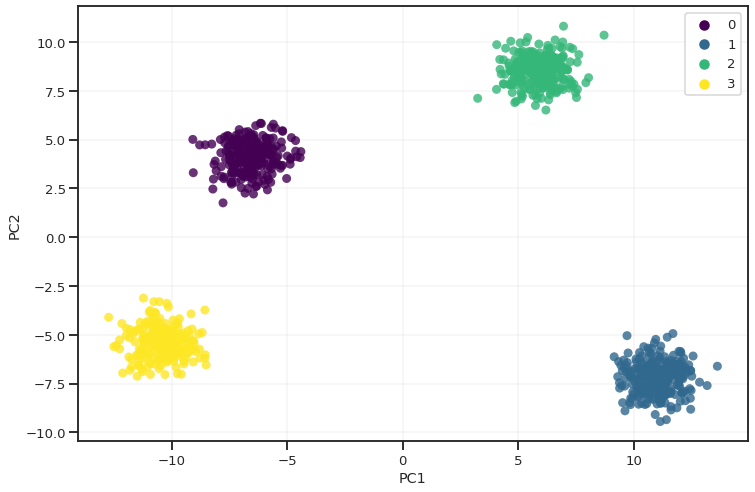

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y, palette='viridis', alpha=0.8, linewidth=0)

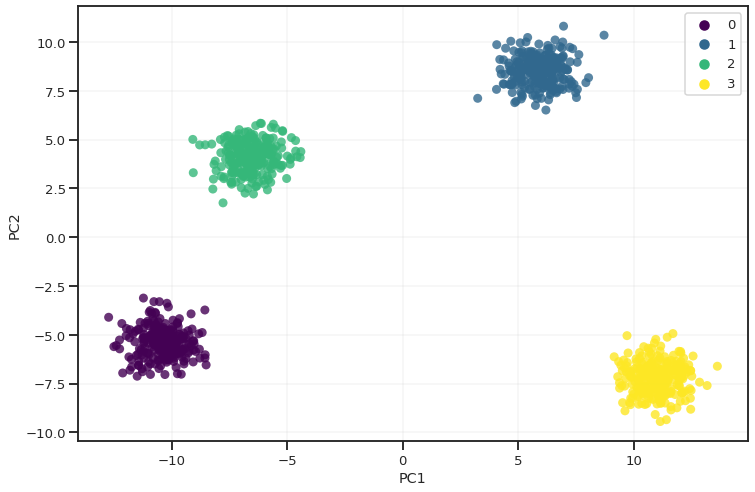

In [ ]:
labels = k_means(df_pca, 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=labels, **scatter_kwargs)

In [ ]:
px.scatter_3d(data_frame=df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

# Wine dataset

# Dataset with mix data

# Interpretação